In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

In [2]:
df=pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:

#importing and dealing with country_group_income data
df1=pd.read_csv('data.csv')
df1.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFG,South Asia,Low income,NaN,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,NaN,Andorra,NaN


In [4]:

#renaming 'Table Name' label of df1 in to 'Country' label
df1.rename(columns={'TableName': 'country'},inplace=True)

In [5]:

new_df=pd.merge(df,df1,how='outer',on='country')
new_df.to_csv('suicide stats.csv',index=False)

In [6]:

#read data 
df=pd.read_csv('suicide stats.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Country Code,Region,IncomeGroup,SpecialNotes,Unnamed: 5
0,Albania,1987.0,male,15-24 years,21.0,312900.0,6.71,Albania1987,NaN,"2,156,624,900",796.0,Generation X,ALB,Europe & Central Asia,Upper middle income,NaN,NaN
1,Albania,1987.0,male,35-54 years,16.0,308000.0,5.19,Albania1987,NaN,"2,156,624,900",796.0,Silent,ALB,Europe & Central Asia,Upper middle income,NaN,NaN
2,Albania,1987.0,female,15-24 years,14.0,289700.0,4.83,Albania1987,NaN,"2,156,624,900",796.0,Generation X,ALB,Europe & Central Asia,Upper middle income,NaN,NaN
3,Albania,1987.0,male,75+ years,1.0,21800.0,4.59,Albania1987,NaN,"2,156,624,900",796.0,G.I. Generation,ALB,Europe & Central Asia,Upper middle income,NaN,NaN
4,Albania,1987.0,male,25-34 years,9.0,274300.0,3.28,Albania1987,NaN,"2,156,624,900",796.0,Boomers,ALB,Europe & Central Asia,Upper middle income,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27990 entries, 0 to 27989
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27990 non-null  object 
 1   year                27820 non-null  float64
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  float64
 5   population          27820 non-null  float64
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  float64
 11  generation          27820 non-null  object 
 12  Country Code        26082 non-null  object 
 13  Region              26036 non-null  object 
 14  IncomeGroup         26036 non-null  object 
 15  SpecialNotes        9604 non-null   object 
 16  Unna

In [8]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),Unnamed: 5
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000,0.0
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414,NaN
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472,NaN
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000,NaN
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000,NaN
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000,NaN
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000,NaN
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000,NaN


By reading data there is some observations realised:

There is null values
It is better to partition data according to age range to handle one of the questions
There is some columns that has no use (eg. country-year, country code, Unnamed: 5)

In [9]:
#Assesing data & building intuitions & Cleansing(Step 2 & 3)

# Getting null values
df.isna().sum()

country                   0
year                    170
sex                     170
age                     170
suicides_no             170
population              170
suicides/100k pop       170
country-year            170
HDI for year          19626
 gdp_for_year ($)       170
gdp_per_capita ($)      170
generation              170
Country Code           1908
Region                 1954
IncomeGroup            1954
SpecialNotes          18386
Unnamed: 5            27990
dtype: int64

In [10]:
df['country'].isna().tail(20)

27970    False
27971    False
27972    False
27973    False
27974    False
27975    False
27976    False
27977    False
27978    False
27979    False
27980    False
27981    False
27982    False
27983    False
27984    False
27985    False
27986    False
27987    False
27988    False
27989    False
Name: country, dtype: bool

In [11]:

df[df['year']==2016]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Country Code,Region,IncomeGroup,SpecialNotes,Unnamed: 5
1248,Armenia,2016.0,male,75+ years,12.0,61956.0,19.37,Armenia2016,NaN,"10,546,135,160",3788.0,Silent,ARM,Europe & Central Asia,Upper middle income,NaN,NaN
1249,Armenia,2016.0,male,55-74 years,16.0,237813.0,6.73,Armenia2016,NaN,"10,546,135,160",3788.0,Boomers,ARM,Europe & Central Asia,Upper middle income,NaN,NaN
1250,Armenia,2016.0,male,35-54 years,16.0,350633.0,4.56,Armenia2016,NaN,"10,546,135,160",3788.0,Generation X,ARM,Europe & Central Asia,Upper middle income,NaN,NaN
1251,Armenia,2016.0,male,15-24 years,5.0,202220.0,2.47,Armenia2016,NaN,"10,546,135,160",3788.0,Millenials,ARM,Europe & Central Asia,Upper middle income,NaN,NaN
1252,Armenia,2016.0,female,75+ years,2.0,102414.0,1.95,Armenia2016,NaN,"10,546,135,160",3788.0,Silent,ARM,Europe & Central Asia,Upper middle income,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25307,Thailand,2016.0,female,75+ years,69.0,1589015.0,4.34,Thailand2016,NaN,"411,755,164,833",6713.0,Silent,THA,East Asia & Pacific,Upper middle income,Fiscal year end: September 30; reporting perio...,NaN
25308,Thailand,2016.0,female,55-74 years,222.0,6049756.0,3.67,Thailand2016,NaN,"411,755,164,833",6713.0,Boomers,THA,East Asia & Pacific,Upper middle income,Fiscal year end: September 30; reporting perio...,NaN
25309,Thailand,2016.0,female,35-54 years,375.0,10629684.0,3.53,Thailand2016,NaN,"411,755,164,833",6713.0,Generation X,THA,East Asia & Pacific,Upper middle income,Fiscal year end: September 30; reporting perio...,NaN
25310,Thailand,2016.0,female,25-34 years,116.0,4702656.0,2.47,Thailand2016,NaN,"411,755,164,833",6713.0,Millenials,THA,East Asia & Pacific,Upper middle income,Fiscal year end: September 30; reporting perio...,NaN


Note: before dealing with NaN values. It is realised that the first dataset with suicidal info. has years limited by year 2016 but the second dataset disturbanced that as it is shown on data.info() that the only non NAN column is that on which join was made which is the country.so depending on that year label & all of the related features with it will be the measure as our main dataset is the one related to suicide. so all of the labels with same no. of NAN values with year label will be deleted.

In [12]:
df.isna().sum()

country                   0
year                    170
sex                     170
age                     170
suicides_no             170
population              170
suicides/100k pop       170
country-year            170
HDI for year          19626
 gdp_for_year ($)       170
gdp_per_capita ($)      170
generation              170
Country Code           1908
Region                 1954
IncomeGroup            1954
SpecialNotes          18386
Unnamed: 5            27990
dtype: int64

In [13]:
#We can make drop NANs for only one label of these and by the default these all labels will not be null but we will do all of
#it
df.dropna(subset=['year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', 
                  'gdp_per_capita ($)', 'generation','IncomeGroup'],inplace=True)

In [14]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25912 entries, 0 to 27819
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             25912 non-null  object 
 1   year                25912 non-null  float64
 2   sex                 25912 non-null  object 
 3   age                 25912 non-null  object 
 4   suicides_no         25912 non-null  float64
 5   population          25912 non-null  float64
 6   suicides/100k pop   25912 non-null  float64
 7   country-year        25912 non-null  object 
 8   HDI for year        7932 non-null   float64
 9    gdp_for_year ($)   25912 non-null  object 
 10  gdp_per_capita ($)  25912 non-null  float64
 11  generation          25912 non-null  object 
 12  Country Code        25912 non-null  object 
 13  Region              25912 non-null  object 
 14  IncomeGroup         25912 non-null  object 
 15  SpecialNotes        9540 non-null   object 
 16  Unna

In [15]:
df['HDI for year'].value_counts()

0.772    84
0.888    84
0.830    72
0.761    72
0.713    72
         ..
0.728    12
0.522    12
0.879    12
0.872    12
0.669    12
Name: HDI for year, Length: 297, dtype: int64

In [16]:

from sklearn.impute import KNNImputer
imputer = KNNImputer()

In [17]:
df['HDI for year']=imputer.fit_transform(df[['HDI for year']])

In [18]:
df['HDI for year'].isna().sum()

0

In [19]:

df.isna().sum()


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year              0
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
Country Code              0
Region                    0
IncomeGroup               0
SpecialNotes          16372
Unnamed: 5            25912
dtype: int64

In [20]:
df.drop(columns=['Country Code',
                 'SpecialNotes','Unnamed: 5',' gdp_for_year ($) '],inplace=True)

In [21]:
df.isna().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
gdp_per_capita ($)    0
generation            0
Region                0
IncomeGroup           0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25912 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             25912 non-null  object 
 1   year                25912 non-null  float64
 2   sex                 25912 non-null  object 
 3   age                 25912 non-null  object 
 4   suicides_no         25912 non-null  float64
 5   population          25912 non-null  float64
 6   suicides/100k pop   25912 non-null  float64
 7   country-year        25912 non-null  object 
 8   HDI for year        25912 non-null  float64
 9   gdp_per_capita ($)  25912 non-null  float64
 10  generation          25912 non-null  object 
 11  Region              25912 non-null  object 
 12  IncomeGroup         25912 non-null  object 
dtypes: float64(6), object(7)
memory usage: 2.8+ MB


In [23]:

#Dealing with datatypes
df.dtypes

country                object
year                  float64
sex                    object
age                    object
suicides_no           float64
population            float64
suicides/100k pop     float64
country-year           object
HDI for year          float64
gdp_per_capita ($)    float64
generation             object
Region                 object
IncomeGroup            object
dtype: object

In [24]:

df = df.astype({'year':'int64','suicides_no':'int64','population':'int64','suicides/100k pop':'int64'})

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25912 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             25912 non-null  object 
 1   year                25912 non-null  int64  
 2   sex                 25912 non-null  object 
 3   age                 25912 non-null  object 
 4   suicides_no         25912 non-null  int64  
 5   population          25912 non-null  int64  
 6   suicides/100k pop   25912 non-null  int64  
 7   country-year        25912 non-null  object 
 8   HDI for year        25912 non-null  float64
 9   gdp_per_capita ($)  25912 non-null  float64
 10  generation          25912 non-null  object 
 11  Region              25912 non-null  object 
 12  IncomeGroup         25912 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 2.8+ MB


In [26]:
# There are no duplicate values
# Dealing with duplicates
df.duplicated().sum()

0

In [27]:
df['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [28]:
df['IncomeGroup'].unique()

array(['Upper middle income', 'High income', 'Lower middle income'],
      dtype=object)

In [29]:
df['Region'].unique()

array(['Europe & Central Asia', 'Latin America & Caribbean',
       'East Asia & Pacific', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'North America', 'South Asia'], dtype=object)

In [30]:
df['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Bosnia and Herzegovina', 'Brazil',
       'Bulgaria', 'Cabo Verde', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji',
       'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada',
       'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Latvia', 'Lithuania', 'Luxembourg', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Romania', 'Russian Federation', 'San Marino', 'Serbia',
       'Seychelle

In [31]:
df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)


unique categorical values that is important is found that there are:

101 countries
7 regions
3 income groups

In [32]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita ($),generation,Region,IncomeGroup
0,Albania,1987,male,15-24 years,21,312900,6,Albania1987,0.779699,796.0,Generation X,Europe & Central Asia,Upper middle income
1,Albania,1987,male,35-54 years,16,308000,5,Albania1987,0.779699,796.0,Silent,Europe & Central Asia,Upper middle income
2,Albania,1987,female,15-24 years,14,289700,4,Albania1987,0.779699,796.0,Generation X,Europe & Central Asia,Upper middle income
3,Albania,1987,male,75+ years,1,21800,4,Albania1987,0.779699,796.0,G.I. Generation,Europe & Central Asia,Upper middle income
4,Albania,1987,male,25-34 years,9,274300,3,Albania1987,0.779699,796.0,Boomers,Europe & Central Asia,Upper middle income


In [33]:
df[df['HDI for year']<0.550]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita ($),generation,Region,IncomeGroup
8066,El Salvador,1990,male,75+ years,13,29955,43,El Salvador1990,0.522,1068.0,G.I. Generation,Latin America & Caribbean,Lower middle income
8067,El Salvador,1990,male,25-34 years,119,339719,35,El Salvador1990,0.522,1068.0,Boomers,Latin America & Caribbean,Lower middle income
8068,El Salvador,1990,male,15-24 years,127,504932,25,El Salvador1990,0.522,1068.0,Generation X,Latin America & Caribbean,Lower middle income
8069,El Salvador,1990,female,15-24 years,112,528567,21,El Salvador1990,0.522,1068.0,Generation X,Latin America & Caribbean,Lower middle income
8070,El Salvador,1990,male,35-54 years,81,427335,18,El Salvador1990,0.522,1068.0,Silent,Latin America & Caribbean,Lower middle income
8071,El Salvador,1990,male,55-74 years,34,201577,16,El Salvador1990,0.522,1068.0,G.I. Generation,Latin America & Caribbean,Lower middle income
8072,El Salvador,1990,female,25-34 years,43,383005,11,El Salvador1990,0.522,1068.0,Boomers,Latin America & Caribbean,Lower middle income
8073,El Salvador,1990,female,35-54 years,24,477092,5,El Salvador1990,0.522,1068.0,Silent,Latin America & Caribbean,Lower middle income
8074,El Salvador,1990,female,55-74 years,9,221802,4,El Salvador1990,0.522,1068.0,G.I. Generation,Latin America & Caribbean,Lower middle income
8075,El Salvador,1990,female,75+ years,1,42375,2,El Salvador1990,0.522,1068.0,G.I. Generation,Latin America & Caribbean,Lower middle income


In [34]:
#GI generation: Born(1900-1927)
#Silent: Born(1928-1945)
#Boomers: Born(1946-1964)
#Generation x: Born (1965-1980)
#Millenials: Born(1981-1996)
#Generation z: Born(1997-)

In [35]:
# sns.jointplot(x='suicides_no',y='gdp_per_capita ($)',data=df)

In [36]:
# sns.pairplot(df,hue='IncomeGroup',vars=['suicides_no','gdp_per_capita ($)'],height=5, aspect=1.3)

In [37]:

# #count plot of income group
# sns.countplot(x='IncomeGroup',data=df)

In [38]:

# sns.jointplot(x='gdp_per_capita ($)',y='suicides_no',data=df)

In [39]:
# sns.barplot(x='IncomeGroup',y='suicides_no',data=df)

In [40]:
# sns.stripplot(x='IncomeGroup',y='suicides_no',data=df)


Being biased to upper middle and high income group is obvious above.

So

The highest number of suicides relative to its count is the low middle income group
upper middle income group shows a relatively high suicide real numbers(Not ratio)
As the gdp increases, the suicide number decreases and that is acceptable as income group depends on gdp
Suicide number is the most at hight HDI (0.700-0.799) (upper-middel income group) and this agrees with point two as it shows real values.

In [41]:

# #age range and suicide_numbers
# sns.stripplot(x='age',y='suicides_no',data=df)

In [42]:
# sns.barplot(x='age',y='suicides_no',data=df)

In [43]:
# #The correlation function shows that there is a high correlation between population and suicide no.
# sns.jointplot(x='population',y='suicides_no',data=df,kind='reg')

In [44]:
# sns.lmplot(x='population',y='suicides_no',data=df,hue='sex')

In [45]:
# sns.barplot(y='suicides_no',x='sex',data=df)

In [46]:

# sns.set(rc={'figure.figsize': [15, 15]}, font_scale=1.2)
# sns.barplot(y='country',x='population',hue='sex',data=df)

In [47]:
# sns.barplot(x='sex',y='population',data=df)

In [48]:
pivot = pd.pivot_table(values='suicides_no', index='country', columns='sex',data=df)

In [49]:

print(pivot)

sex                        female         male
country                                       
Albania                  5.250000     9.674242
Antigua and Barbuda      0.006173     0.061728
Argentina               98.526882   343.510753
Armenia                  3.322148     9.463087
Aruba                    0.202381     1.000000
...                           ...          ...
United Arab Emirates     2.722222    14.555556
United Kingdom         175.736559   559.774194
United States         1149.446237  4409.763441
Uruguay                 16.785714    61.416667
Uzbekistan              70.151515   193.507576

[93 rows x 2 columns]


Drawing conclusions
As we has gone through the analysis process we have dealt with data in order to answer the questions mentioned above. Of course there is more questions to be asked and can be got from data but that is good for now as our focus on data analysis is not as important as Showing the ability to draw conclusions using AI (Which is ML in our file).

So First I will get to the conclusions that is got out of this analysis that answers the first two questions:

What is the age range on which suicidal actions are the most? and for this question the answer was: It is seen that the suicide number increases in the age range(35-54) Which is at mostly the age of work and it is low in age ranges beyond 75 and lower than 14.
What is the most correlated feature with the increase of suicidal actions? And the answer of these question was that: The correlation function shows that there is a high correlation between population and suicide number so we had gone into regression (Implot) to see the correlation visualized and to know its type and it was found that the regression line on the scatter plot shows that there is a positive correlation between suicide number and population. And by looking to the population two different genders it was found that: The suicides among males is more than that among females. But as sex is dependant on the population of male and female among the community som we need to make more plots to make sure of this result so we had gone into a barplot that shows the gender values relative to the population and it was found that: The sex label values are nearly equal in population so this indicates that the previous result that males commit more suicides than females is true.
There is some historical features that was neglected as it has no purpose in our work. As an example of that the the political era for each age range in a each country, and the years that had the most suicidal actions(Which could be analyzed more to find global actions and national actions in this years that caused many suicidal actions). As an example of my talk is the huge increase of suicidal actions in russian federations at the years of the cold-war.

Going into the third question: What is the expected number of suicides given other labels that is related to it?

The answer of this question would be given through a ML model that needs from us to go further into data_preprocessing to get the best of these features and deal with problems that the ML model may face (E.g: Categorical data values) to get the most precise model



In [50]:
!pip3 install geopy

You should consider upgrading via the '/Users/joyitaroy/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [51]:
from  geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='Essam')

In [52]:
#Getting two lists for lat and lang
lat=[]
lang=[]
counter=0
for i in df['country'].value_counts():
    country =df['country'].value_counts().index[counter]
    loc = geolocator.geocode(country)
    lat.append(loc.latitude)
    lang.append(loc.longitude)
    counter+=1

In [53]:

data={'country':df['country'].value_counts().index, 'lat':lat, 'lang': lang}

In [54]:
lat_lang=pd.DataFrame(data)

In [55]:
lat_lang

,country,lat,lang
0,Mauritius,-20.275945,57.570357
1,Iceland,64.984182,-18.105901
2,Netherlands,52.500170,5.748082
3,Austria,47.200000,13.200000
4,Singapore,1.357107,103.819499
...,...,...,...
88,San Marino,43.945862,12.458306
89,Bosnia and Herzegovina,44.305348,17.596147
90,Cabo Verde,16.000055,-24.008395
91,Dominica,19.281318,-70.035907


In [56]:
df=pd.merge(df,lat_lang,how='outer',on='country')

In [57]:

df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita ($),generation,Region,IncomeGroup,lat,lang
0,Albania,1987,male,15-24 years,21,312900,6,Albania1987,0.779699,796.0,Generation X,Europe & Central Asia,Upper middle income,41.000028,19.999962
1,Albania,1987,male,35-54 years,16,308000,5,Albania1987,0.779699,796.0,Silent,Europe & Central Asia,Upper middle income,41.000028,19.999962
2,Albania,1987,female,15-24 years,14,289700,4,Albania1987,0.779699,796.0,Generation X,Europe & Central Asia,Upper middle income,41.000028,19.999962
3,Albania,1987,male,75+ years,1,21800,4,Albania1987,0.779699,796.0,G.I. Generation,Europe & Central Asia,Upper middle income,41.000028,19.999962
4,Albania,1987,male,25-34 years,9,274300,3,Albania1987,0.779699,796.0,Boomers,Europe & Central Asia,Upper middle income,41.000028,19.999962


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25912 entries, 0 to 25911
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             25912 non-null  object 
 1   year                25912 non-null  int64  
 2   sex                 25912 non-null  object 
 3   age                 25912 non-null  object 
 4   suicides_no         25912 non-null  int64  
 5   population          25912 non-null  int64  
 6   suicides/100k pop   25912 non-null  int64  
 7   country-year        25912 non-null  object 
 8   HDI for year        25912 non-null  float64
 9   gdp_per_capita ($)  25912 non-null  float64
 10  generation          25912 non-null  object 
 11  Region              25912 non-null  object 
 12  IncomeGroup         25912 non-null  object 
 13  lat                 25912 non-null  float64
 14  lang                25912 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 3.2+

In [59]:
# sns.pairplot(df, hue='sex',vars=['lat','lang','suicides_no'])

In [60]:
#Checking weird data values or types
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop       int64
country-year           object
HDI for year          float64
gdp_per_capita ($)    float64
generation             object
Region                 object
IncomeGroup            object
lat                   float64
lang                  float64
dtype: object

In [61]:
#Is there any weird data types? (Negative or zero values)
list_5=['year','suicides_no','population','suicides/100k pop','HDI for year','gdp_per_capita ($)']
counter_0=0
counter_1=0
for i in list_5:
    for j in df:
        #As year has an upper limit& lower limit so it will be dealt alone, unlike other features which have only lower limit.
        if (counter_0 == 0):
            if (df['year'][counter_1]<=0) | (df['year'][counter_1]>2020):
                print(counter_1,'\n')
        else:
            if df[i][counter_1]<=0:
                print(counter_1,'\n') 
        counter_1+=1
    counter_0+=1

22 

23 

45 

46 

47 

57 

58 

59 



In [62]:
i=0
list_6=[22,23,45,46,47,57,58,59]
while(i<8):
    print(df.iloc[list_6[i]],'\n')
    i+=1

country                             Albania
year                                   1988
sex                                  female
age                              5-14 years
suicides_no                               0
population                           317200
suicides/100k pop                         0
country-year                    Albania1988
HDI for year                       0.779699
gdp_per_capita ($)                      769
generation                     Generation X
Region                Europe & Central Asia
IncomeGroup             Upper middle income
lat                                      41
lang                                     20
Name: 22, dtype: object 

country                             Albania
year                                   1988
sex                                    male
age                              5-14 years
suicides_no                               0
population                           345000
suicides/100k pop                         0
countr

In [63]:
df.drop(columns=['suicides/100k pop','country-year'],inplace=True)

In [64]:
df['age'].value_counts().index

Index(['35-54 years', '75+ years', '15-24 years', '55-74 years', '25-34 years',
       '5-14 years'],
      dtype='object')

In [65]:

dict_age={'5-14 years':1,'15-24 years':2,'25-34 years':3,'35-54 years':4,'55-74 years':5,'75+ years':6}

In [66]:
#Mapping dict_age to age label
df['age']=df['age'].map(dict_age)

In [67]:
df['age']

0        2
1        4
2        2
3        6
4        3
        ..
25907    4
25908    6
25909    1
25910    1
25911    5
Name: age, Length: 25912, dtype: int64

In [68]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le1=LabelEncoder()

In [69]:

df['IncomeGroup']=le.fit_transform(list(df['IncomeGroup']))

In [70]:
df['IncomeGroup']

0        2
1        2
2        2
3        2
4        2
        ..
25907    1
25908    1
25909    1
25910    1
25911    1
Name: IncomeGroup, Length: 25912, dtype: int64

In [71]:
le.inverse_transform(df['IncomeGroup'])

array(['Upper middle income', 'Upper middle income',
       'Upper middle income', ..., 'Lower middle income',
       'Lower middle income', 'Lower middle income'], dtype='<U19')

In [72]:
df['generation']=le1.fit_transform(list(df['generation']))

In [73]:

le.inverse_transform(df['IncomeGroup'])

array(['Upper middle income', 'Upper middle income',
       'Upper middle income', ..., 'Lower middle income',
       'Lower middle income', 'Lower middle income'], dtype='<U19')

In [74]:

#list for the nominal categorical features
pd.get_dummies(df,columns=['sex','country','Region'],drop_first=True)

,year,age,suicides_no,population,HDI for year,gdp_per_capita ($),generation,IncomeGroup,lat,lang,...,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa
0,1987,2,21,312900,0.779699,796.0,2,2,41.000028,19.999962,...,0,0,0,0,1,0,0,0,0,0
1,1987,4,16,308000,0.779699,796.0,5,2,41.000028,19.999962,...,0,0,0,0,1,0,0,0,0,0
2,1987,2,14,289700,0.779699,796.0,2,2,41.000028,19.999962,...,0,0,0,0,1,0,0,0,0,0
3,1987,6,1,21800,0.779699,796.0,1,2,41.000028,19.999962,...,0,0,0,0,1,0,0,0,0,0
4,1987,3,9,274300,0.779699,796.0,0,2,41.000028,19.999962,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25907,2014,4,107,3620833,0.675000,2309.0,2,1,41.323730,63.952810,...,0,0,0,1,1,0,0,0,0,0
25908,2014,6,9,348465,0.675000,2309.0,5,1,41.323730,63.952810,...,0,0,0,1,1,0,0,0,0,0
25909,2014,1,60,2762158,0.675000,2309.0,3,1,41.323730,63.952810,...,0,0,0,1,1,0,0,0,0,0
25910,2014,1,44,2631600,0.675000,2309.0,3,1,41.323730,63.952810,...,0,0,0,1,1,0,0,0,0,0


In [75]:

df=pd.get_dummies(df,columns=['sex'],drop_first=True)


since region and country features may cause alot of features and dummy data existance in model training if it was encode to get_dummies so I will be using binary encoding as it will be more dimensionaly reduced.

In [76]:
!pip3 install category_encoders

You should consider upgrading via the '/Users/joyitaroy/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [77]:
from category_encoders import BinaryEncoder
encoder1= BinaryEncoder(cols=['Region','country'])
df=encoder1.fit_transform(df)

/Users/joyitaroy/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [78]:
df

,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7,year,age,...,gdp_per_capita ($),generation,Region_0,Region_1,Region_2,Region_3,IncomeGroup,lat,lang,sex_male
0,0,0,0,0,0,0,0,1,1987,2,...,796.0,2,0,0,0,1,2,41.000028,19.999962,1
1,0,0,0,0,0,0,0,1,1987,4,...,796.0,5,0,0,0,1,2,41.000028,19.999962,1
2,0,0,0,0,0,0,0,1,1987,2,...,796.0,2,0,0,0,1,2,41.000028,19.999962,0
3,0,0,0,0,0,0,0,1,1987,6,...,796.0,1,0,0,0,1,2,41.000028,19.999962,1
4,0,0,0,0,0,0,0,1,1987,3,...,796.0,0,0,0,0,1,2,41.000028,19.999962,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25907,0,1,0,1,1,1,0,1,2014,4,...,2309.0,2,0,0,0,1,1,41.323730,63.952810,0
25908,0,1,0,1,1,1,0,1,2014,6,...,2309.0,5,0,0,0,1,1,41.323730,63.952810,0
25909,0,1,0,1,1,1,0,1,2014,1,...,2309.0,3,0,0,0,1,1,41.323730,63.952810,1
25910,0,1,0,1,1,1,0,1,2014,1,...,2309.0,3,0,0,0,1,1,41.323730,63.952810,0


In [79]:
encoder1.inverse_transform(df)

,country,year,age,suicides_no,population,HDI for year,gdp_per_capita ($),generation,Region,IncomeGroup,lat,lang,sex_male
0,Albania,1987,2,21,312900,0.779699,796.0,2,Europe & Central Asia,2,41.000028,19.999962,1
1,Albania,1987,4,16,308000,0.779699,796.0,5,Europe & Central Asia,2,41.000028,19.999962,1
2,Albania,1987,2,14,289700,0.779699,796.0,2,Europe & Central Asia,2,41.000028,19.999962,0
3,Albania,1987,6,1,21800,0.779699,796.0,1,Europe & Central Asia,2,41.000028,19.999962,1
4,Albania,1987,3,9,274300,0.779699,796.0,0,Europe & Central Asia,2,41.000028,19.999962,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25907,Uzbekistan,2014,4,107,3620833,0.675000,2309.0,2,Europe & Central Asia,1,41.323730,63.952810,0
25908,Uzbekistan,2014,6,9,348465,0.675000,2309.0,5,Europe & Central Asia,1,41.323730,63.952810,0
25909,Uzbekistan,2014,1,60,2762158,0.675000,2309.0,3,Europe & Central Asia,1,41.323730,63.952810,1
25910,Uzbekistan,2014,1,44,2631600,0.675000,2309.0,3,Europe & Central Asia,1,41.323730,63.952810,0




Splitting data into train/test split

In [80]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25912 entries, 0 to 25911
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_0           25912 non-null  int64  
 1   country_1           25912 non-null  int64  
 2   country_2           25912 non-null  int64  
 3   country_3           25912 non-null  int64  
 4   country_4           25912 non-null  int64  
 5   country_5           25912 non-null  int64  
 6   country_6           25912 non-null  int64  
 7   country_7           25912 non-null  int64  
 8   year                25912 non-null  int64  
 9   age                 25912 non-null  int64  
 10  suicides_no         25912 non-null  int64  
 11  population          25912 non-null  int64  
 12  HDI for year        25912 non-null  float64
 13  gdp_per_capita ($)  25912 non-null  float64
 14  generation          25912 non-null  int64  
 15  Region_0            25912 non-null  int64  
 16  Regi

In [81]:
#Knowing & dealing with outliers
from scipy import stats
df[(np.abs(stats.zscore(df))<3).all(axis=1)]

/Users/joyitaroy/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7,year,age,...,gdp_per_capita ($),generation,Region_0,Region_1,Region_2,Region_3,IncomeGroup,lat,lang,sex_male


In [82]:
# country	year	age	suicides_no	population	HDI for year	gdp_per_capita ($)	generation	Region	IncomeGroup	

# x=df[['country','region', 'generation', 'sex_male' ]]

x=df.drop(columns=['suicides_no', 'population', 'gdp_per_capita ($)', 'HDI for year', 'lat', 'lang', 'Region_0', 'Region_1', 'Region_2', 'Region_3'])
y=df['suicides_no']

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)

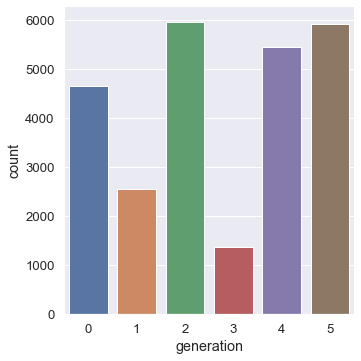

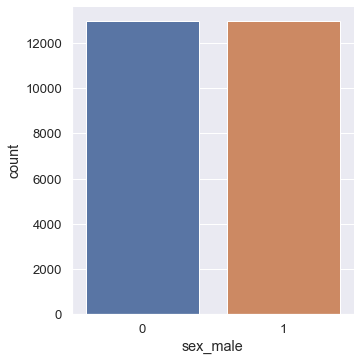

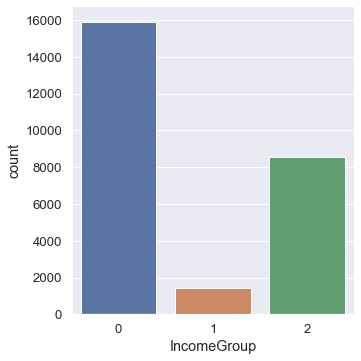

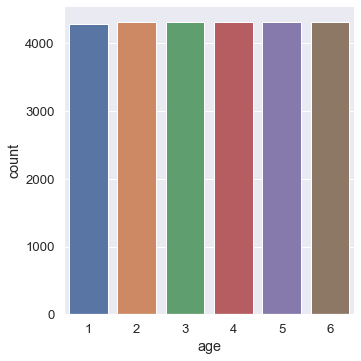

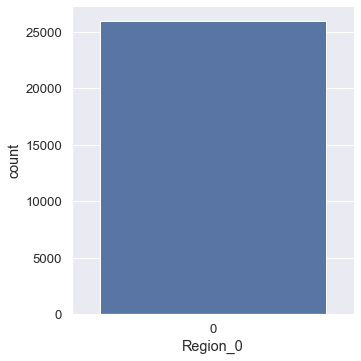

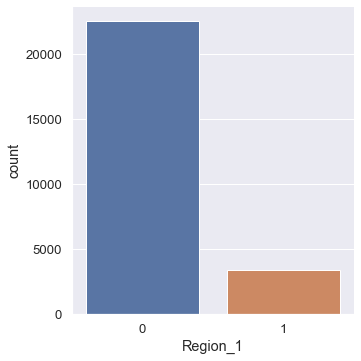

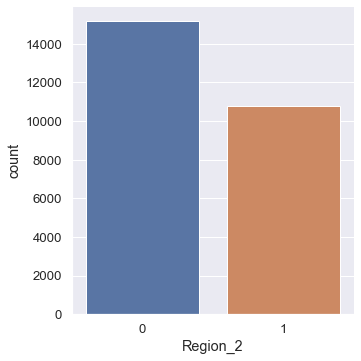

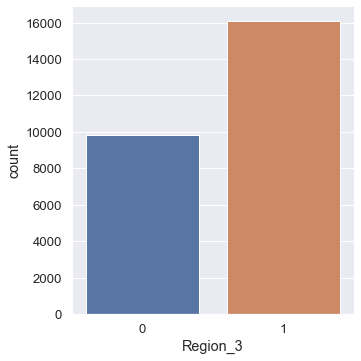

In [84]:

#Checking if there is imbalanced classes in the categorical features that may hold like that.
list_7=['generation','sex_male','IncomeGroup','age','Region_0','Region_1','Region_2','Region_3']
for i in list_7:
    sns.catplot(x=i,data=df,kind='count')

We needn’t deal with imbalanced data as for ['generation','sex_male','IncomeGroup','age'] the variation between values is not huge to deal with it. And for ['Region_0','Region_1','Region_2','Region_3'] This is natural that 0&1s values go like that as they are a result for one hot encoding 4 one feature so on sampling the ratios will remain the same as the other regions will be sampled to.

In [85]:

from sklearn.preprocessing import RobustScaler
rb=RobustScaler()

In [86]:

training_data=pd.concat([x_train,y_train],axis=1)
column_names=training_data.columns
training_data=rb.fit_transform(training_data)
training_data=pd.DataFrame(training_data,columns=column_names)

In [87]:
training_data

,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7,year,age,generation,IncomeGroup,sex_male,suicides_no
0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,1.0,-0.692308,0.333333,-0.666667,0.0,-1.0,2.789474
1,0.0,1.0,0.0,1.0,0.0,-1.0,1.0,1.0,-0.384615,0.333333,-0.666667,0.0,-1.0,0.669173
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.846154,-0.666667,0.666667,0.0,-1.0,-0.187970
3,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,0.461538,0.666667,1.000000,0.0,0.0,-0.203008
4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.345865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20724,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-1.153846,-0.666667,0.000000,0.0,-1.0,-0.082707
20725,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.923077,0.666667,-0.333333,0.0,-1.0,1.263158
20726,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.692308,0.000000,-0.666667,0.0,0.0,0.157895
20727,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,-1.076923,1.000000,-0.333333,1.0,0.0,-0.210526



3. Feature Selection
Since feature selection is done for all x columns so we need to merge x_train & x_test before going in feature selection. Ans since X from above represents x_train & x_test So this method will be done on X before applying train_test_split once again.

In [88]:
from sklearn.feature_selection import f_regression,SelectPercentile

In [89]:
selector = SelectPercentile (percentile=80, score_func=f_regression)

In [90]:

all_feat=x.columns
selector.fit(x,y)

/Users/joyitaroy/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectPercentile(percentile=80,
                 score_func=<function f_regression at 0x7fdbd7984820>)

In [91]:

selected_features_idx = selector.get_support(indices=True)

In [92]:

selected_features = all_feat[selected_features_idx]

In [93]:

selected_features

Index(['country_1', 'country_2', 'country_3', 'country_4', 'country_5',
       'country_6', 'country_7', 'age', 'generation', 'sex_male'],
      dtype='object')

In [94]:

x=x[selected_features]

In [95]:

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=27)


After finishing data preprocessing step, we shall head to choosing a ML algorithm to train data on.

Since we want to get a predictive model for 'Y' with 'x' labeled data so we will deal with Supervised ML & since we want to predict suicides No. so it will be a regression problem.

Knowing that we are dealing with many features not only one so we will apply Multiple linear regression.

In [98]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [99]:
model=RandomForestRegressor(random_state=27)

In [100]:
model.fit(x_train,y_train)

RandomForestRegressor(random_state=27)

In [101]:
y_predict=model.predict(x_test)

In [102]:
y_predict

array([311.79117954,   0.        ,   1.97317965, ...,  34.67996577,
         0.        ,  97.79360831])

In [103]:
model.score(x_test,y_test)

0.9713637004382994

In [104]:

import joblib

In [105]:
joblib.dump(model,'model.pkl')

['model.pkl']

In [106]:
model = joblib.load('model.pkl')

In [107]:
x_test.iloc[6]

country_1     0
country_2     1
country_3     0
country_4     0
country_5     0
country_6     1
country_7     1
age           1
generation    4
sex_male      0
Name: 9481, dtype: int64

In [111]:
model.predict([list(x_test.iloc[155].values)])

array([8.68014453])